### Import packages

In [1]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### User defined functions

In [2]:
# Few methods which are used again and again in the file

# Function for value count
def value_count(x):
    print("---------------------------------------------------------------\n")
    print(round(x.value_counts(normalize=True)*100,2))
    print("---------------------------------------------------------------\n")

# calculation null values in dataframe columnwise
def calculateNullPercentage(x):
    return round(100 * (x.isnull().sum() / len(x.index)), 2)

In [3]:
# Function for Univariate plot of Categorical Variable and its bivariate plot against the target variable is_bad

def plot_uni_bi(a,y,r=0):
    """
    Input:
    a - dataframe
    y - column
    r - rotation of xticks
    """
    # Plotting vs self and target variable

    plt.figure(figsize=(18, 12))

    # Univariate Analysis 
    ax= plt.subplot(221)
    round(a[y].value_counts(normalize=True),2).plot(kind='bar',color='green')
    ttl=y+' %'
    plt.title(ttl)
    plt.xlabel(y)
    plt.xticks(rotation=r)
    plt.ylabel('% of ' + y)

    # Bivariate Analysis

    ax=plt.subplot(222)
    plt.title('Distribution of '+ '%s' %y +' vs. Exited', fontsize=14)
    sns.countplot(x = y, hue = 'Exited', data = a, order = sorted(set(a[y])))
    plt.xticks(rotation = r)
    plt.show()

In [4]:
def tabular_uni_bi(d,y):
    """
    Input:
    d - dataframe
    y - column
    """
    print("***********************************")
    print(y + " vs Exited %")
    print("***********************************")
    print(round(pd.crosstab(d[y],d.Exited).apply(lambda r: (r*100)/r.sum(),axis=1),2))
            
    print("***********************************")

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_cal(X_df,col):
    """
    Input:
    X_df : X_train df
    col : list of columns
    """
    vif = pd.DataFrame()
    vif['Features'] = X_df[col].columns
    vif['VIF'] = [variance_inflation_factor(X_df[col].values, i) for i in range(X_df[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print("VIF values are as:");
    print(vif)

In [6]:
def print_results(y_train, y_pred, y_test, y_pred_test):
    """
    Input:
    y_train :
    y_pred :
    y_test :
    y_pred_test :
    """
    # to print the results in good way
    #print("Classification Report:"); print("="*len("Accuracy:"))
    #print(f"TRAIN: {classification_report(y_train, y_pred)}")
    #print("====================================================")
    #print(f"TEST: {classification_report(y_test, y_pred_test)}")


    print("Accuracy:"); print("="*len("Accuracy:"))
    print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
    print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

    print("\nPrecision:"); print("="*len("Precision:"))
    print(f"TRAIN: {precision_score(y_train, y_pred)}")
    print(f"TEST: {precision_score(y_test, y_pred_test)}")

    print("\nRecall:"); print("="*len("Recall:"))
    print(f"TRAIN: {recall_score(y_train, y_pred)}")
    print(f"TEST: {recall_score(y_test, y_pred_test)}")

    print("\n F1 Score:"); print("="*len("F1 Score:"))
    print(f"TRAIN: {f1_score(y_train, y_pred)}")
    print(f"TEST: {f1_score(y_test, y_pred_test)}")

    print("\n ROC AUC:"); print("="*len("ROC AUC:"))
    print(f"TRAIN: {roc_auc_score(y_train, y_pred)}")
    print(f"TEST: {roc_auc_score(y_test, y_pred_test)}")

### Preliminary Analysis

In [7]:
df = pd.read_csv('Churn_Modelling.csv') # read csv dataset 

df_bkp = df.copy() # create backup

In [8]:
print('Total number of rows: ' + str(df.shape[0]) + '\nTotal number of columns: ' + str(df.shape[1]))

Total number of rows: 10000
Total number of columns: 14


In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.style
null_perc = 100*(df.isnull().sum()/len(df.index)) #Finding percentage of null values

print("Columns with % of missing values > 0  are listed as : \n")

pd.DataFrame(null_perc[ null_perc > 0 ], columns = ['missing %']).style.format("{:.2f}").background_gradient() #Printing columns which have more than 0% missing values

Columns with % of missing values > 0  are listed as : 



,missing %


### Exploratory Data Analysis

    -RowNumber and Surname are high cardinality variable, we will drop it from further analysis.
    -CustomerId is set as index.

In [15]:
df.drop(columns=['RowNumber','Surname'], 
        inplace=True) # drop high cardinality columns

In [16]:
df.shape

(10000, 12)

In [17]:
df.set_index('CustomerId',
             inplace=True) #reset index to Id

In [18]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Dependent variable - Exited 
    - moderately imbalanced classes

---------------------------------------------------------------

0    79.63
1    20.37
Name: Exited, dtype: float64
---------------------------------------------------------------



<Axes: ylabel='Exited'>

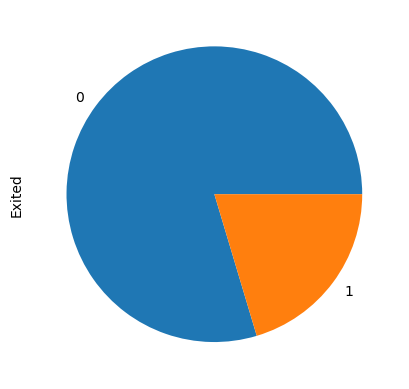

In [19]:
value_count(df['Exited'])
df['Exited'].value_counts().plot.pie() #pie plot

#### Independent variable - Geography
    - variable type  : nominal
    - 32% of customers from Germany Geography exited

---------------------------------------------------------------

France     50.14
Germany    25.09
Spain      24.77
Name: Geography, dtype: float64
---------------------------------------------------------------



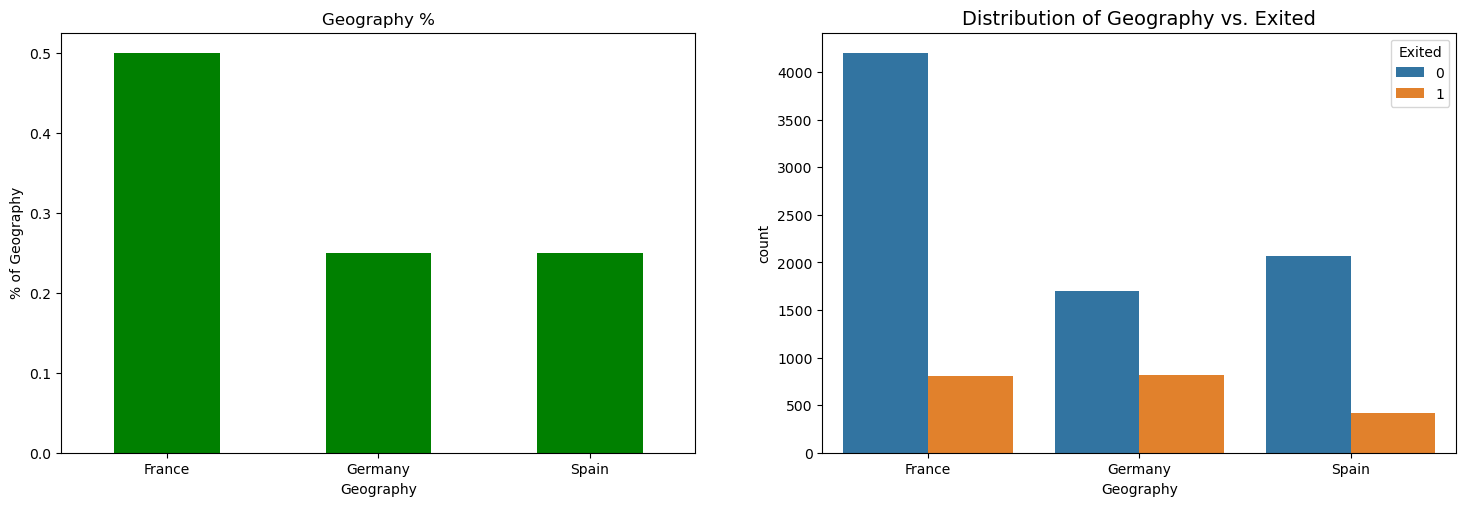

***********************************
Geography vs Exited %
***********************************
Exited         0      1
Geography              
France     83.85  16.15
Germany    67.56  32.44
Spain      83.33  16.67
***********************************


In [20]:
value_count(df['Geography'])
plot_uni_bi(df,'Geography')
tabular_uni_bi(df,'Geography')

#### Independent variable - Gender
    - variable type  : nominal
    - 25% of customers from Female category exited

---------------------------------------------------------------

Male      54.57
Female    45.43
Name: Gender, dtype: float64
---------------------------------------------------------------



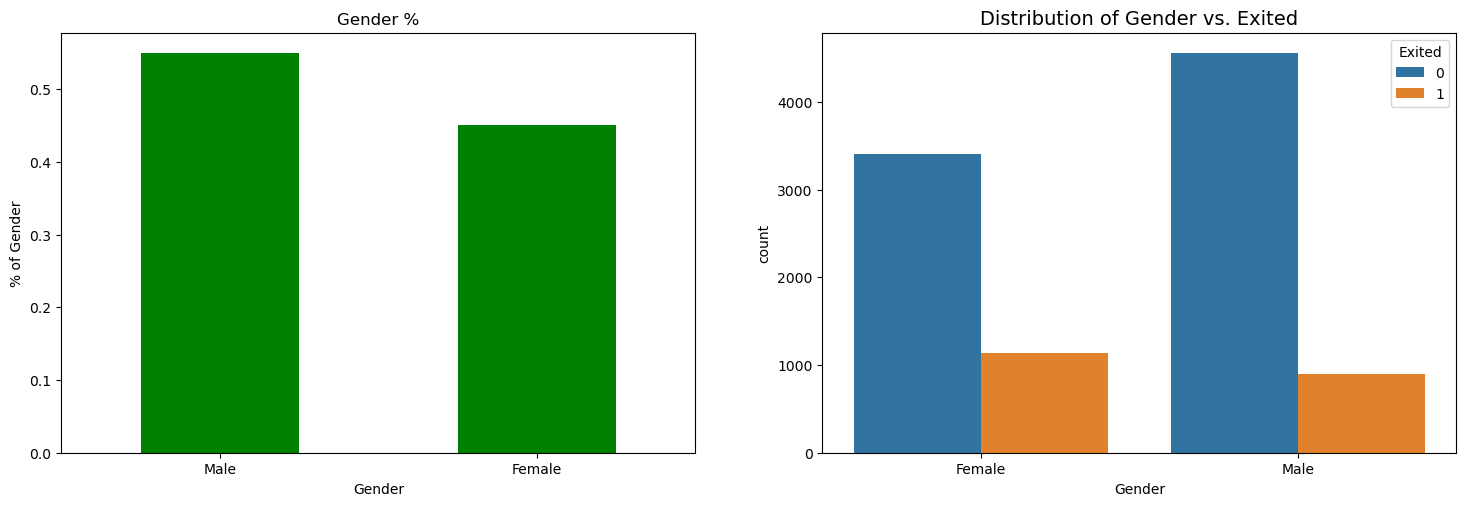

***********************************
Gender vs Exited %
***********************************
Exited      0      1
Gender              
Female  74.93  25.07
Male    83.54  16.46
***********************************


In [21]:
value_count(df['Gender'])
plot_uni_bi(df,'Gender')
tabular_uni_bi(df,'Gender')

In [22]:
# replace VERIFIED - income and VERIFIED- income source to 1 and not verified to 0
df['Gender'] = np.where(df.Gender=="Male",0,1)

In [23]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15634602,619,France,1,42,2,0.00,1,1,1,101348.88,1
15647311,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
15619304,502,France,1,42,8,159660.80,3,1,0,113931.57,1
15701354,699,France,1,39,1,0.00,2,0,0,93826.63,0
15737888,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


#### Dependent variable - NumOfProducts
    - cutomers with 3 and 4 number of products have high exit rate

---------------------------------------------------------------

1    50.84
2    45.90
3     2.66
4     0.60
Name: NumOfProducts, dtype: float64
---------------------------------------------------------------



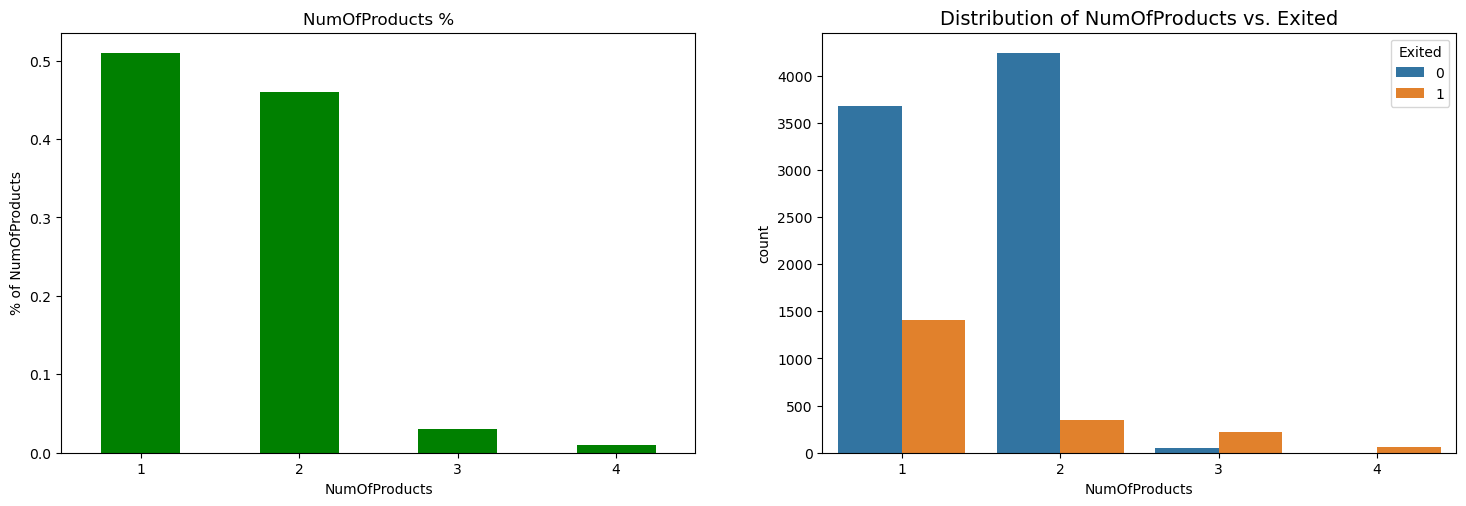

***********************************
NumOfProducts vs Exited %
***********************************
Exited             0       1
NumOfProducts               
1              72.29   27.71
2              92.42    7.58
3              17.29   82.71
4               0.00  100.00
***********************************


In [24]:
value_count(df['NumOfProducts'])
plot_uni_bi(df,'NumOfProducts')
tabular_uni_bi(df,'NumOfProducts')

In [25]:
#df[['NumOfProducts']] = df[['NumOfProducts']].apply(pd.to_)

#### Dependent variable - HasCrCard
    - variable type - nominal

---------------------------------------------------------------

1    70.55
0    29.45
Name: HasCrCard, dtype: float64
---------------------------------------------------------------



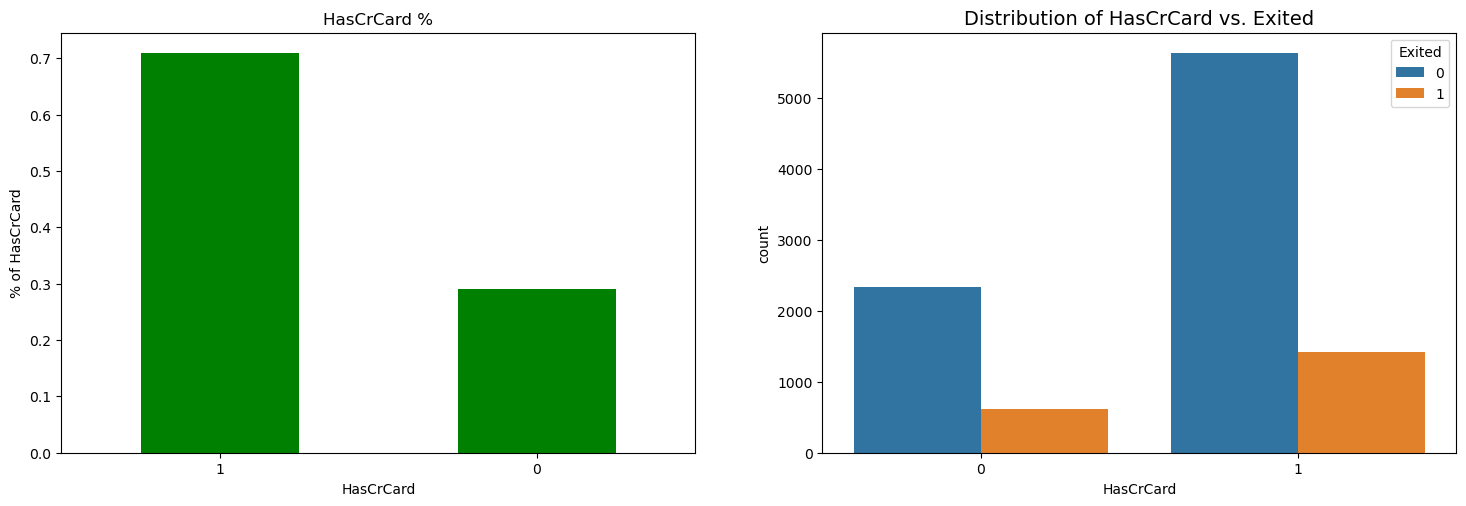

***********************************
HasCrCard vs Exited %
***********************************
Exited         0      1
HasCrCard              
0          79.19  20.81
1          79.82  20.18
***********************************


In [26]:
value_count(df['HasCrCard'])
plot_uni_bi(df,'HasCrCard')
tabular_uni_bi(df,'HasCrCard')

#### Dependent variable - IsActiveMember
    - variable type - nominal

---------------------------------------------------------------

1    51.51
0    48.49
Name: IsActiveMember, dtype: float64
---------------------------------------------------------------



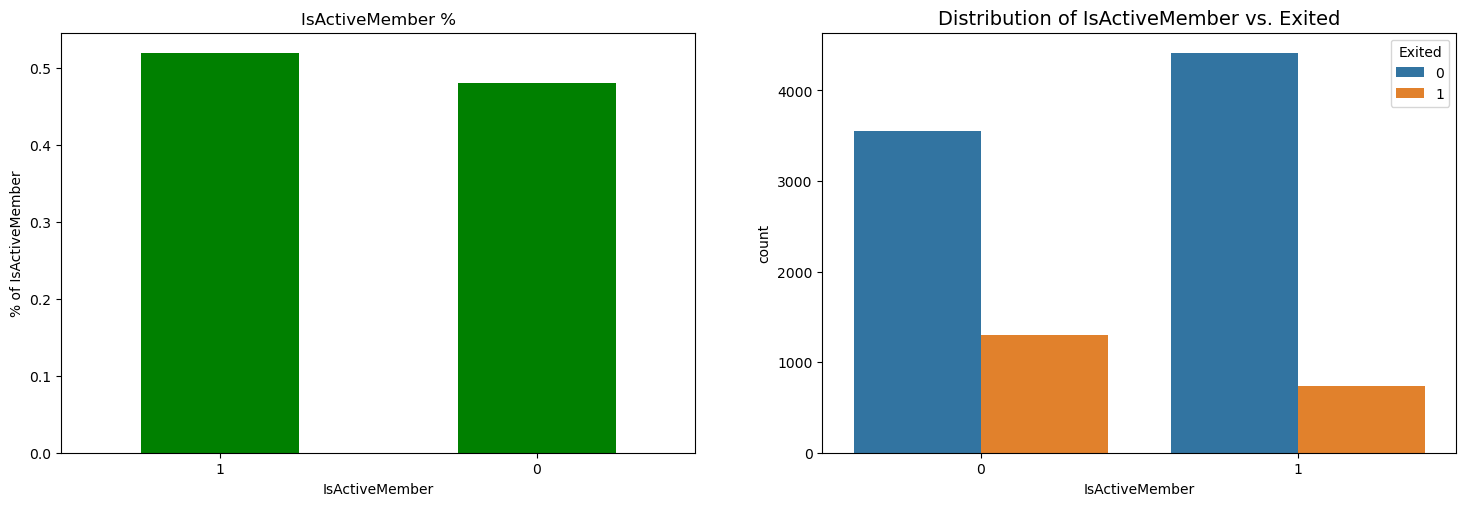

***********************************
IsActiveMember vs Exited %
***********************************
Exited              0      1
IsActiveMember              
0               73.15  26.85
1               85.73  14.27
***********************************


In [27]:
value_count(df['IsActiveMember'])
plot_uni_bi(df,'IsActiveMember')
tabular_uni_bi(df,'IsActiveMember')

#### Dependent variable - CreditScore
    - variable type - int
    - normally distributed
    - Lower bound outliers present for exited customers
    - 850 is the fixed upper bound value

<Axes: xlabel='CreditScore', ylabel='Density'>

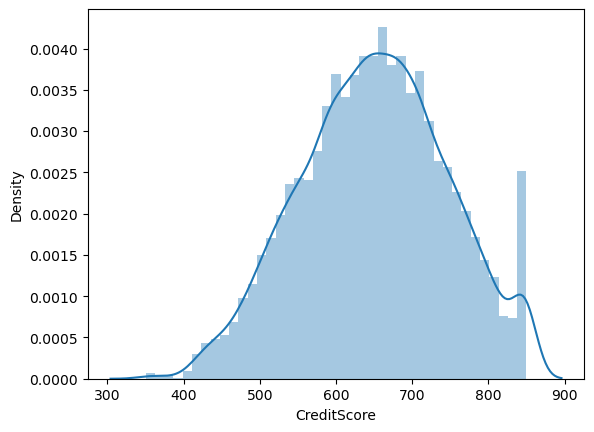

In [28]:
sns.distplot(df.CreditScore)

In [29]:
df.CreditScore.describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [30]:
df[df['CreditScore']>=850]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15737888,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0
15717426,850,France,0,36,7,0.00,1,1,1,40812.90,0
15716334,850,Spain,1,45,2,122311.21,1,1,1,19482.50,0
15604482,850,Spain,0,30,2,141040.01,1,1,1,5978.20,0
15733247,850,France,0,33,10,0.00,1,1,0,4861.72,1
...,...,...,...,...,...,...,...,...,...,...,...
15709256,850,France,1,28,9,0.00,2,1,1,164864.67,0
15603111,850,Spain,0,71,10,69608.14,1,1,0,97893.40,1
15730579,850,France,0,68,5,169445.40,1,1,1,186335.07,0


<Axes: xlabel='Exited', ylabel='CreditScore'>

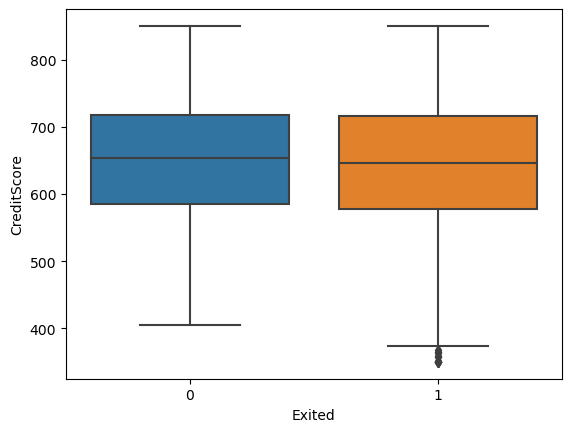

In [31]:
sns.boxplot(data=df, x='Exited', y='CreditScore')

#### Dependent variable - Age
    - variable type - int
    - normally distributed with right skew
    - Median age for exited customers is 55 which is 10 years less than non-exited customers.
    - many outliers are present
    - outlier treatment : bin the age and create a new variable age_bin 
    - drop Age as we have created a derived variable age_bin
 

<Axes: xlabel='Age', ylabel='Density'>

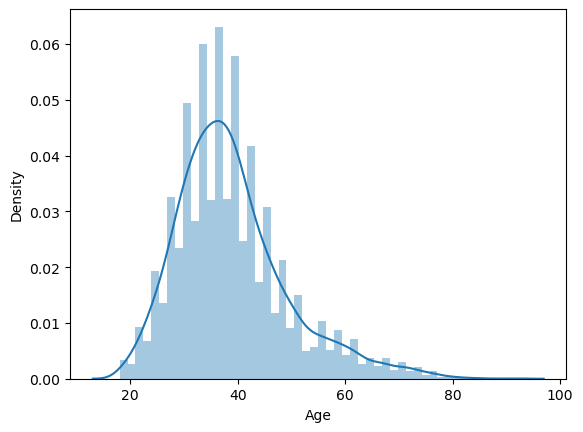

In [32]:
sns.distplot(df.Age)

<Axes: xlabel='Exited', ylabel='Age'>

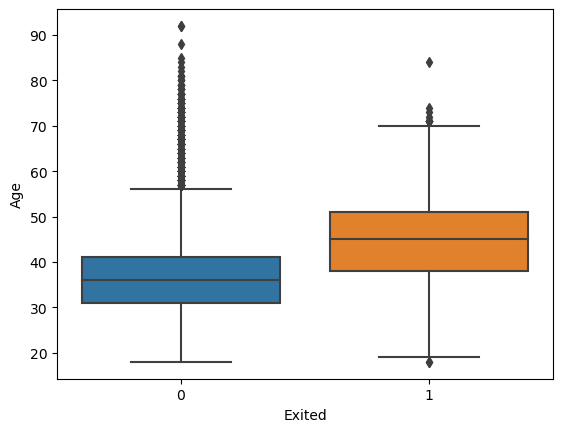

In [33]:
sns.boxplot(data=df, x='Exited', y='Age')

In [34]:
df.Age.describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [35]:
bins = [10, 20, 30, 40, 50, 60, 70, 100]
df['age_bin'] = pd.cut(df['Age'], bins)

In [36]:
df[df['Age']>70]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age_bin
CustomerId,,,,,,,,,,,,
15805254,652,Spain,1,75,10,0.00,2,1,1,114675.75,0,"(70, 100]"
15589975,646,France,1,73,6,97259.25,1,0,1,104719.66,0,"(70, 100]"
15808473,673,France,0,72,1,0.00,2,0,1,111981.19,0,"(70, 100]"
15793726,681,France,1,79,0,0.00,2,0,1,170968.99,0,"(70, 100]"
15712287,652,France,1,80,4,0.00,2,1,1,188603.07,0,"(70, 100]"
...,...,...,...,...,...,...,...,...,...,...,...,...
15603111,850,Spain,0,71,10,69608.14,1,1,0,97893.40,1,"(70, 100]"
15636061,649,Germany,0,78,4,68345.86,2,1,1,142566.75,0,"(70, 100]"
15644103,659,Spain,0,78,2,151675.65,1,0,1,49978.67,0,"(70, 100]"


In [37]:
value_count(df['age_bin'])

---------------------------------------------------------------

(30, 40]     44.51
(40, 50]     23.20
(20, 30]     18.79
(50, 60]      7.97
(60, 70]      3.31
(70, 100]     1.33
(10, 20]      0.89
Name: age_bin, dtype: float64
---------------------------------------------------------------



#### Dependent variable - Tenure
    - variable type - int

<Axes: xlabel='Tenure', ylabel='Density'>

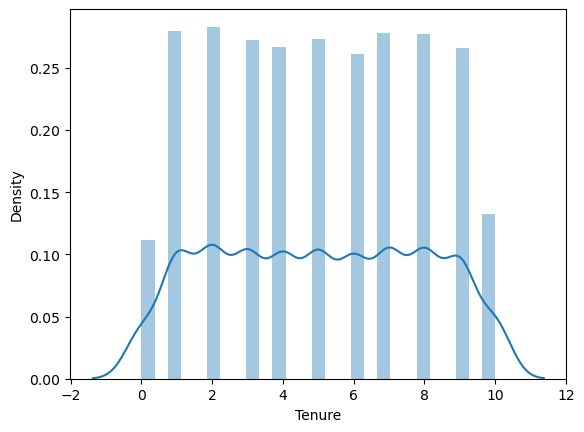

In [38]:
sns.distplot(df.Tenure)

---------------------------------------------------------------

2     10.48
1     10.35
7     10.28
8     10.25
5     10.12
3     10.09
4      9.89
9      9.84
6      9.67
10     4.90
0      4.13
Name: Tenure, dtype: float64
---------------------------------------------------------------



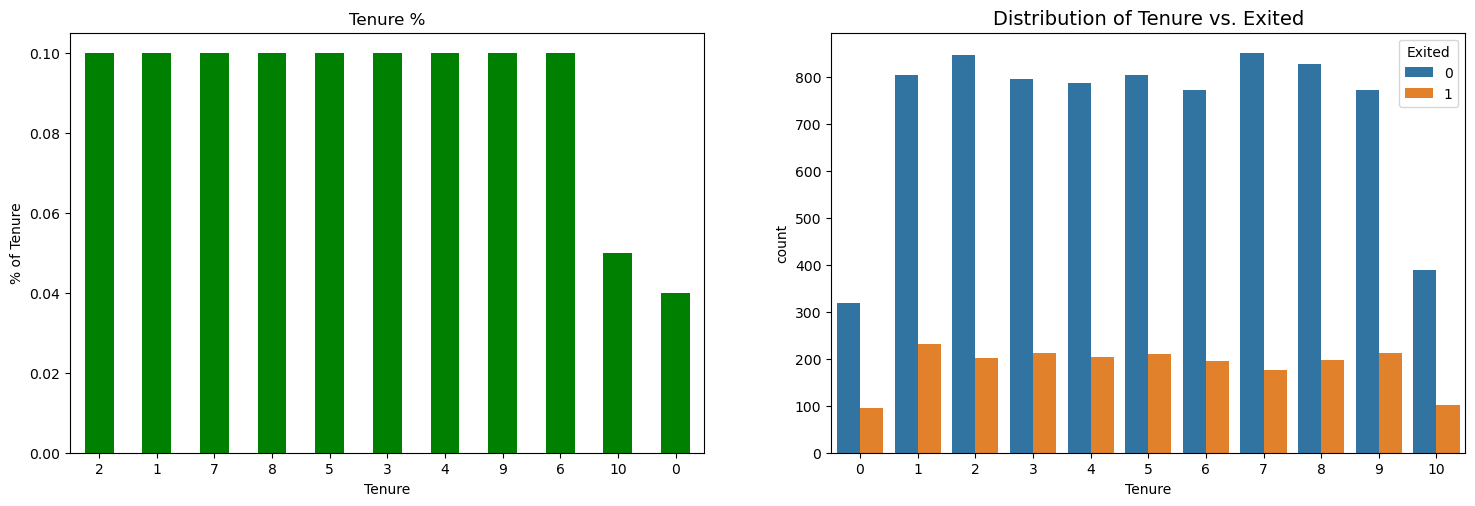

***********************************
Tenure vs Exited %
***********************************
Exited      0      1
Tenure              
0       77.00  23.00
1       77.58  22.42
2       80.82  19.18
3       78.89  21.11
4       79.47  20.53
5       79.35  20.65
6       79.73  20.27
7       82.78  17.22
8       80.78  19.22
9       78.35  21.65
10      79.39  20.61
***********************************


In [39]:
value_count(df['Tenure'])
plot_uni_bi(df,'Tenure')
tabular_uni_bi(df,'Tenure')

<Axes: xlabel='Balance', ylabel='Density'>

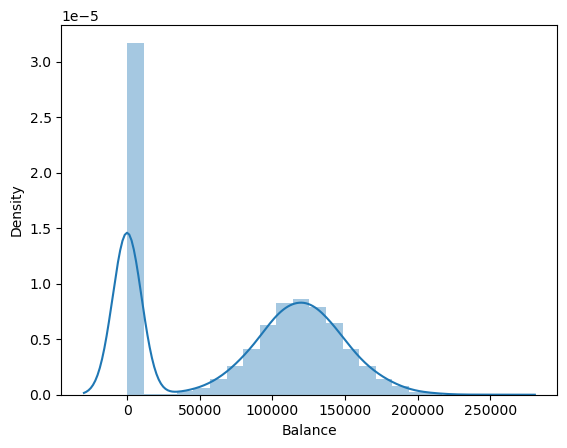

In [40]:
sns.distplot(df.Balance)

In [41]:
df.Balance.describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

<Axes: xlabel='Exited', ylabel='Balance'>

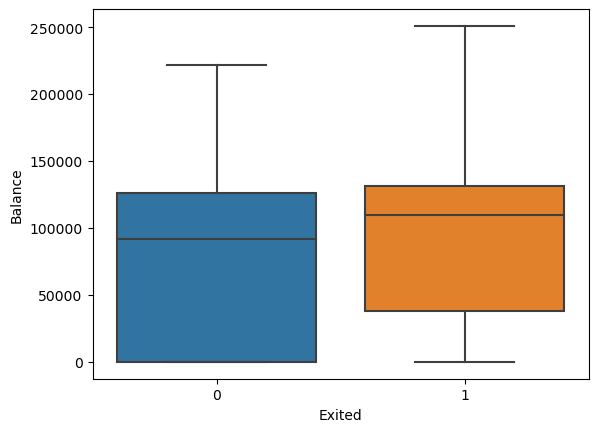

In [42]:
sns.boxplot(data=df, x='Exited', y='Balance')

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

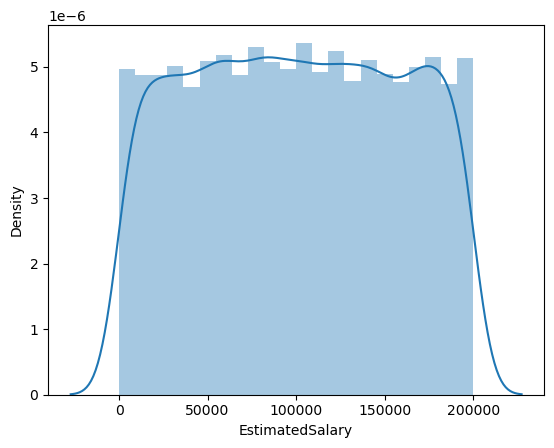

In [43]:
sns.distplot(df.EstimatedSalary)

In [44]:
df.EstimatedSalary.describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

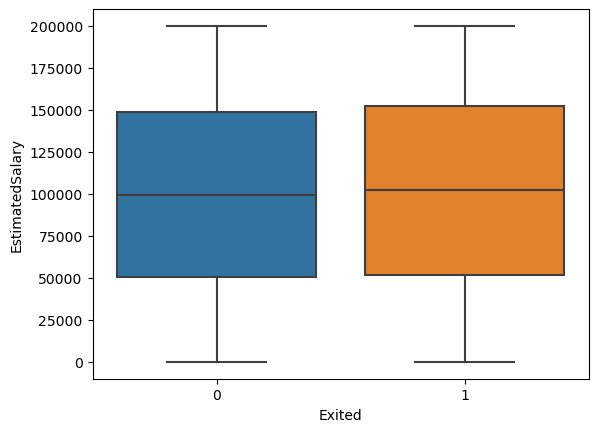

In [45]:
sns.boxplot(data=df, x='Exited', y='EstimatedSalary')

In [46]:
df['bal_to_sal'] = df.Balance/df.EstimatedSalary

In [47]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age_bin,bal_to_sal
CustomerId,,,,,,,,,,,,,
15634602,619,France,1,42,2,0.00,1,1,1,101348.88,1,"(40, 50]",0.000000
15647311,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0,"(40, 50]",0.744677
15619304,502,France,1,42,8,159660.80,3,1,0,113931.57,1,"(40, 50]",1.401375
15701354,699,France,1,39,1,0.00,2,0,0,93826.63,0,"(30, 40]",0.000000
15737888,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0,"(40, 50]",1.587055


In [48]:
df.drop(columns=['Age','Balance','EstimatedSalary'], 
        inplace=True) # drop high cardinality columns

In [49]:
df.head()

,CreditScore,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,age_bin,bal_to_sal
CustomerId,,,,,,,,,,
15634602,619,France,1,2,1,1,1,1,"(40, 50]",0.000000
15647311,608,Spain,1,1,1,0,1,0,"(40, 50]",0.744677
15619304,502,France,1,8,3,1,0,1,"(40, 50]",1.401375
15701354,699,France,1,1,2,0,0,0,"(30, 40]",0.000000
15737888,850,Spain,1,2,1,1,1,0,"(40, 50]",1.587055


In [50]:
dummy = pd.get_dummies(df[['Geography',"age_bin"]], drop_first=True)
dummy

,Geography_Germany,Geography_Spain,"age_bin_(20, 30]","age_bin_(30, 40]","age_bin_(40, 50]","age_bin_(50, 60]","age_bin_(60, 70]","age_bin_(70, 100]"
CustomerId,,,,,,,,
15634602,0,0,0,0,1,0,0,0
15647311,0,1,0,0,1,0,0,0
15619304,0,0,0,0,1,0,0,0
15701354,0,0,0,1,0,0,0,0
15737888,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
15606229,0,0,0,1,0,0,0,0
15569892,0,0,0,1,0,0,0,0
15584532,0,0,0,1,0,0,0,0


In [51]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [52]:
num_vars = ['CreditScore']
df_num = df[num_vars]
df_num.head()
df_num[num_vars] = scaler.fit_transform(df_num[num_vars])
df_num

,CreditScore
CustomerId,
15634602,0.538
15647311,0.516
15619304,0.304
15701354,0.698
15737888,1.000
...,...
15606229,0.842
15569892,0.332
15584532,0.718


In [53]:
df

,CreditScore,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,age_bin,bal_to_sal
CustomerId,,,,,,,,,,
15634602,619,France,1,2,1,1,1,1,"(40, 50]",0.000000
15647311,608,Spain,1,1,1,0,1,0,"(40, 50]",0.744677
15619304,502,France,1,8,3,1,0,1,"(40, 50]",1.401375
15701354,699,France,1,1,2,0,0,0,"(30, 40]",0.000000
15737888,850,Spain,1,2,1,1,1,0,"(40, 50]",1.587055
...,...,...,...,...,...,...,...,...,...,...
15606229,771,France,0,5,2,1,0,0,"(30, 40]",0.000000
15569892,516,France,0,10,1,1,1,0,"(30, 40]",0.564108
15584532,709,France,1,7,1,0,1,1,"(30, 40]",0.000000


In [54]:
X =  pd.concat([df[['Gender','Tenure','NumOfProducts','HasCrCard','IsActiveMember','bal_to_sal']],df_num, dummy], axis=1)


In [55]:
Y = df.Exited

In [56]:
# Splitting the data into train(80%) and test(20%)
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    train_size=0.8, 
                                                    test_size=0.2, 
                                                    random_state=50)

In [57]:
print(f'X_train shape : {X_train.shape}')
print(f'y_train shape : {y_train.shape}')
print(f'X_test shape : {X_test.shape}')
print(f'y_test shape : {y_test.shape}')

X_train shape : (8000, 15)
y_train shape : (8000,)
X_test shape : (2000, 15)
y_test shape : (2000,)


In [58]:
import statsmodels.api as sm
model = sm.Logit(y_train,X_train )
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.410578
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7985
Method:                           MLE   Df Model:                           14
Date:                Sat, 05 Aug 2023   Pseudo R-squ.:                  0.1892
Time:                        21:21:16   Log-Likelihood:                -3284.6
converged:                       True   LL-Null:                       -4051.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Gender                0.4806      0.062      7.727      0.000       0.359       0.602
Tenure               -0.0275      0.011     -2.600      0.009      -0.048      -0.007
NumOfProducts        -0.2603      0.051     -5.124      0.000      -0.360      -0.161
HasCrCard            -0.0586      0.067     -0.875      0.382      -0.190       0.073
IsActiveMember       -1.0378      0.065    -15.890      0.000      -1.166      -0.910
bal_to_sal            0.0014      0.001      0.952      0.341      -0.001       0.004
CreditScore          -0.6273      0.152     -4.116      0.000      -0.926      -0.329
Geography_Germany     0.8750      0.072     12.214      0.000       0.735       1.015
Geography_Spain       0.0293      0.080      0.368      0.713      -0.127       0.186
age_bin_(20, 30]     -1.6284      0.164     -9.926      0.000      -1.950      -1.307
age_bin_(30, 40]     -1.1379      0.141     -8.094      0.000      -1.413      -0.862
age_bin_(40, 50]      0.2571      0.142      1.815      0.070      -0.021       0.535
age_bin_(50, 60]      1.3207      0.160      8.233      0.000       1.006       1.635
age_bin_(60, 70]      0.5174      0.195      2.651      0.008       0.135       0.900
age_bin_(70, 100]    -1.3042      0.401     -3.251      0.001      -2.091      -0.518
=====================================================================================
"""

In [59]:
vif_cal(X_train,X_train.columns)

VIF values are as:
             Features   VIF
10   age_bin_(30, 40]  9.74
6         CreditScore  9.69
2       NumOfProducts  7.58
11   age_bin_(40, 50]  5.53
9    age_bin_(20, 30]  4.80
1              Tenure  3.92
3           HasCrCard  3.31
12   age_bin_(50, 60]  2.49
4      IsActiveMember  2.10
0              Gender  1.81
13   age_bin_(60, 70]  1.64
7   Geography_Germany  1.50
8     Geography_Spain  1.49
14  age_bin_(70, 100]  1.30
5          bal_to_sal  1.00


In [60]:
X_train = X_train.drop(['age_bin_(30, 40]'], axis=1)

In [61]:

model1 = sm.Logit(y_train,X_train )
result = model1.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.414619
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7986
Method:                           MLE   Df Model:                           13
Date:                Sat, 05 Aug 2023   Pseudo R-squ.:                  0.1813
Time:                        21:21:16   Log-Likelihood:                -3316.9
converged:                       True   LL-Null:                       -4051.3
Covariance Type:            nonrobust   LLR p-value:                2.500e-306
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Gender                0.3922      0.061      6.444      0.000       0.273       0.511
Tenure               -0.0526      0.010     -5.232      0.000      -0.072      -0.033
NumOfProducts        -0.4433      0.046     -9.610      0.000      -0.534      -0.353
HasCrCard            -0.2112      0.063     -3.343      0.001      -0.335      -0.087
IsActiveMember       -1.1116      0.064    -17.255      0.000      -1.238      -0.985
bal_to_sal            0.0010      0.001      0.714      0.475      -0.002       0.004
CreditScore          -1.2869      0.129     -9.947      0.000      -1.540      -1.033
Geography_Germany     0.7968      0.071     11.260      0.000       0.658       0.936
Geography_Spain      -0.0569      0.079     -0.723      0.470      -0.211       0.097
age_bin_(20, 30]     -0.6375      0.110     -5.799      0.000      -0.853      -0.422
age_bin_(40, 50]      1.2654      0.072     17.622      0.000       1.125       1.406
age_bin_(50, 60]      2.3476      0.104     22.597      0.000       2.144       2.551
age_bin_(60, 70]      1.5292      0.154      9.943      0.000       1.228       1.831
age_bin_(70, 100]    -0.2688      0.383     -0.702      0.482      -1.019       0.481
=====================================================================================
"""

In [62]:
vif_cal(X_train,X_train.columns)

VIF values are as:
             Features   VIF
6         CreditScore  6.86
2       NumOfProducts  6.01
1              Tenure  3.57
3           HasCrCard  3.04
4      IsActiveMember  2.04
0              Gender  1.76
7   Geography_Germany  1.48
8     Geography_Spain  1.47
10   age_bin_(40, 50]  1.47
9    age_bin_(20, 30]  1.39
11   age_bin_(50, 60]  1.16
12   age_bin_(60, 70]  1.07
13  age_bin_(70, 100]  1.04
5          bal_to_sal  1.00


In [63]:
X_train = X_train.drop(['Geography_Spain'], axis=1)

In [64]:
model2 = sm.Logit(y_train,X_train )
result = model2.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.414651
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7987
Method:                           MLE   Df Model:                           12
Date:                Sat, 05 Aug 2023   Pseudo R-squ.:                  0.1812
Time:                        21:21:17   Log-Likelihood:                -3317.2
converged:                       True   LL-Null:                       -4051.3
Covariance Type:            nonrobust   LLR p-value:                2.869e-307
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Gender                0.3916      0.061      6.436      0.000       0.272       0.511
Tenure               -0.0530      0.010     -5.281      0.000      -0.073      -0.033
NumOfProducts        -0.4467      0.046     -9.729      0.000      -0.537      -0.357
HasCrCard            -0.2132      0.063     -3.379      0.001      -0.337      -0.090
IsActiveMember       -1.1132      0.064    -17.292      0.000      -1.239      -0.987
bal_to_sal            0.0010      0.001      0.721      0.471      -0.002       0.004
CreditScore          -1.2995      0.128    -10.132      0.000      -1.551      -1.048
Geography_Germany     0.8149      0.066     12.297      0.000       0.685       0.945
age_bin_(20, 30]     -0.6388      0.110     -5.811      0.000      -0.854      -0.423
age_bin_(40, 50]      1.2630      0.072     17.610      0.000       1.122       1.404
age_bin_(50, 60]      2.3450      0.104     22.587      0.000       2.141       2.548
age_bin_(60, 70]      1.5262      0.154      9.927      0.000       1.225       1.827
age_bin_(70, 100]    -0.2685      0.383     -0.702      0.483      -1.018       0.481
=====================================================================================
"""

In [65]:
X_train = X_train.drop(['age_bin_(70, 100]'], axis=1)

In [66]:
model3 = sm.Logit(y_train,X_train )
result = model3.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.414684
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7988
Method:                           MLE   Df Model:                           11
Date:                Sat, 05 Aug 2023   Pseudo R-squ.:                  0.1811
Time:                        21:21:17   Log-Likelihood:                -3317.5
converged:                       True   LL-Null:                       -4051.3
Covariance Type:            nonrobust   LLR p-value:                3.150e-308
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Gender                0.3910      0.061      6.425      0.000       0.272       0.510
Tenure               -0.0532      0.010     -5.299      0.000      -0.073      -0.034
NumOfProducts        -0.4469      0.046     -9.734      0.000      -0.537      -0.357
HasCrCard            -0.2143      0.063     -3.397      0.001      -0.338      -0.091
IsActiveMember       -1.1173      0.064    -17.417      0.000      -1.243      -0.992
bal_to_sal            0.0010      0.001      0.723      0.469      -0.002       0.004
CreditScore          -1.3012      0.128    -10.146      0.000      -1.553      -1.050
Geography_Germany     0.8138      0.066     12.284      0.000       0.684       0.944
age_bin_(20, 30]     -0.6340      0.110     -5.777      0.000      -0.849      -0.419
age_bin_(40, 50]      1.2682      0.071     17.761      0.000       1.128       1.408
age_bin_(50, 60]      2.3511      0.104     22.713      0.000       2.148       2.554
age_bin_(60, 70]      1.5325      0.154      9.981      0.000       1.232       1.833
=====================================================================================
"""

In [67]:
X_train = X_train.drop(['bal_to_sal'], axis=1)

In [69]:
model4 = sm.Logit(y_train,X_train )
result = model4.fit()
result.summary()


Optimization terminated successfully.
         Current function value: 0.414869
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7989
Method:                           MLE   Df Model:                           10
Date:                Sat, 05 Aug 2023   Pseudo R-squ.:                  0.1808
Time:                        21:21:25   Log-Likelihood:                -3319.0
converged:                       True   LL-Null:                       -4051.3
Covariance Type:            nonrobust   LLR p-value:                1.104e-308
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Gender                0.3897      0.061      6.407      0.000       0.270       0.509
Tenure               -0.0531      0.010     -5.289      0.000      -0.073      -0.033
NumOfProducts        -0.4488      0.046     -9.778      0.000      -0.539      -0.359
HasCrCard            -0.2137      0.063     -3.388      0.001      -0.337      -0.090
IsActiveMember       -1.1160      0.064    -17.405      0.000      -1.242      -0.990
CreditScore          -1.2961      0.128    -10.115      0.000      -1.547      -1.045
Geography_Germany     0.8182      0.066     12.369      0.000       0.689       0.948
age_bin_(20, 30]     -0.6337      0.110     -5.774      0.000      -0.849      -0.419
age_bin_(40, 50]      1.2706      0.071     17.800      0.000       1.131       1.410
age_bin_(50, 60]      2.3535      0.103     22.754      0.000       2.151       2.556
age_bin_(60, 70]      1.5314      0.154      9.974      0.000       1.230       1.832
=====================================================================================
"""

In [70]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()

In [71]:
logReg.fit(X_train,y_train)

LogisticRegression()

In [72]:
y_train_pred = logReg.predict(X_train)


In [73]:
X_test = X_test.drop(['age_bin_(30, 40]'], axis=1)

In [74]:
X_test = X_test.drop(['Geography_Spain'], axis=1)

In [75]:
X_test = X_test.drop(['bal_to_sal'], axis=1)

In [76]:
X_test = X_test.drop(['age_bin_(70, 100]'], axis=1)

In [85]:
X_test.shape

(2000, 11)

In [81]:
YTrainProb = logReg.predict_proba(X_train)
YTrainProb

array([[0.94278809, 0.05721191],
       [0.31303535, 0.68696465],
       [0.52073328, 0.47926672],
       ...,
       [0.62867675, 0.37132325],
       [0.80607641, 0.19392359],
       [0.96576828, 0.03423172]])

In [82]:
YTextProb = logReg.predict_proba(X_test)
YTextProb

array([[0.445452  , 0.554548  ],
       [0.9052834 , 0.0947166 ],
       [0.8516023 , 0.1483977 ],
       ...,
       [0.90738958, 0.09261042],
       [0.70831599, 0.29168401],
       [0.66271999, 0.33728001]])

In [77]:
y_test_pred = logReg.predict(X_test)

In [78]:
#Model Evaluation 

score = logReg.score(X_train, y_train)

In [79]:
print("Accuracy score on train data :", score.round(2))

Accuracy score on train data : 0.83


In [83]:
textScore = logReg.score(X_test, y_test)

In [84]:
print("Accuracy score on train data :", textScore.round(2))

Accuracy score on train data : 0.83


In [91]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score

In [88]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [92]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      6365
           1       0.68      0.29      0.41      1635

    accuracy                           0.83      8000
   macro avg       0.76      0.63      0.66      8000
weighted avg       0.81      0.83      0.80      8000



In [94]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1598
           1       0.67      0.32      0.43       402

    accuracy                           0.83      2000
   macro avg       0.76      0.64      0.67      2000
weighted avg       0.81      0.83      0.81      2000



In [95]:
cmTrain = confusion_matrix(y_train, y_train_pred)

In [96]:
print(cmTrain)

[[6139  226]
 [1153  482]]


Area under the ROC Curve :0.759983


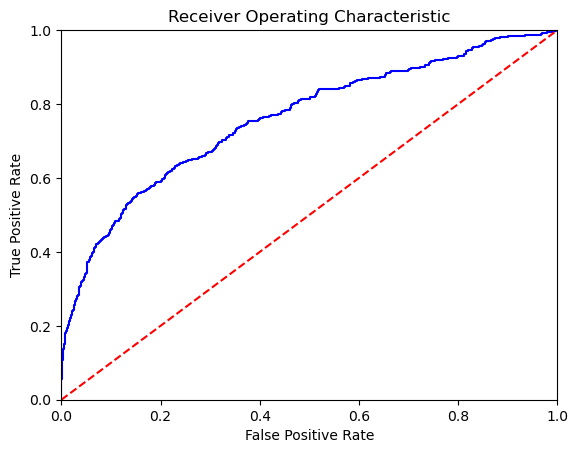

In [97]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test,YTextProb[:, 1], drop_intermediate=True)
roc_auc = auc(fpr, tpr)

print("Area under the ROC Curve :%f" % roc_auc)
plt.title('Receiver Operating Characteristic')
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' %roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

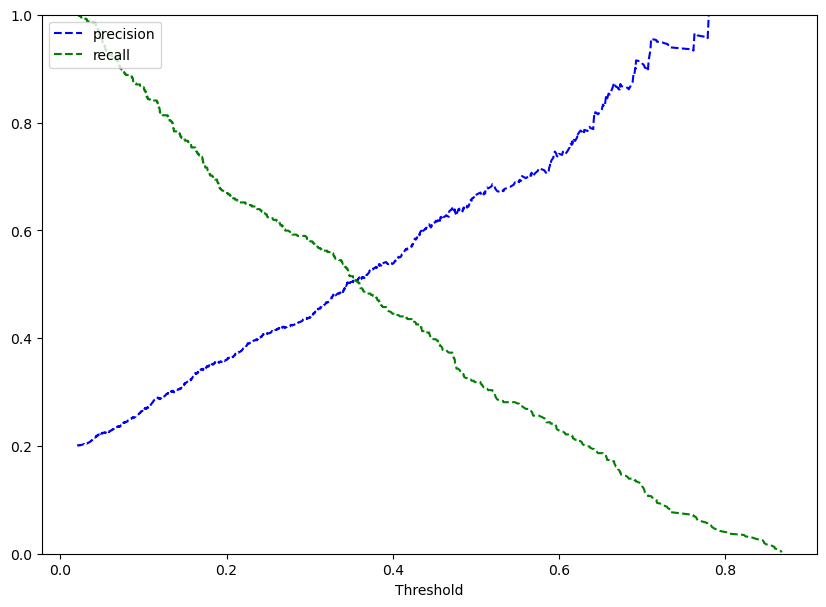

In [98]:
precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_test, YTextProb[:, 1])
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()